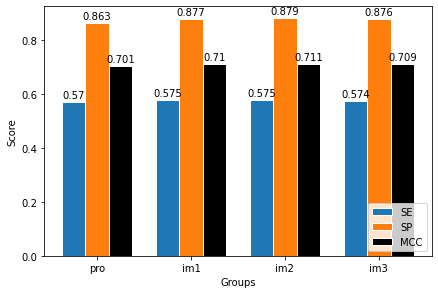

In [12]:
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np

with open("E:/pythonProject1/Test/result_2_1.txt",'r') as f2_1:
    result2_1 = []
    for line in f2_1.readlines():
        result2_1.append(line.strip())
with open("E:/pythonProject1/Test/result_2_2.txt",'r') as f2_2:
    result2_2 = []
    for line in f2_2.readlines():
        result2_2.append(line.strip())
with open("E:/pythonProject1/Test/result_2_3.txt",'r') as f2_3:
    result2_3 = []
    for line in f2_3.readlines():
        result2_3.append(line.strip())
with open("E:/pythonProject1/Test/result_2_4.txt",'r') as f2_4:
    result2_4 = []
    for line in f2_4.readlines():
        result2_4.append(line.strip())
result2 = []
for i in [result2_1, result2_2, result2_3, result2_4]:
    result2.append(i)
    
with open("E:/pythonProject1/Test/target.txt",'r') as ft:
    target = []
    for line in ft.readlines():
        target.append(line.strip())
        
length = len(target)

TP_2 = [0, 0, 0, 0]
FN_2 = [0, 0, 0, 0]
FP_2 = [0, 0, 0, 0]
TN_2 = [0, 0, 0, 0]
SE_2 = [0, 0, 0, 0]
SP_2 = [0, 0, 0, 0]
MCC_2 = [0, 0, 0, 0]
for index in range(4): 
    for i in range(length):
        tmp_length = len(target[i])
        for j in range(tmp_length):
            if result2[index][i][j] == '(' and target[i][j] == '(' or result2[index][i][j] == ')' and target[i][j] == ')':
                TP_2[index] += 1
            if (result2[index][i][j] == '(' or result2[index][i][j] == ')') and target[i][j] == '.':
                FP_2[index] += 1
            if (target[i][j] == '(' or target[i][j] == ')') and result2[index][i][j] == '.':
                FN_2[index] += 1
            if result2[index][i][j] == '.' and target[i][j] == '.':
                TN_2[index] += 1
    SE_2[index] = TP_2[index] / (TP_2[index] + FN_2[index])
    SP_2[index] = TP_2[index] / (TP_2[index] + FP_2[index])
    MCC_2[index] = math.sqrt(SE_2[index] * SP_2[index])
    
fig, ax = plt.subplots()

barWidth = 0.25
r1 = np.arange(len(SE_2))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, SE_2, width=barWidth, edgecolor='white',label='SE' )
plt.bar(r2, SP_2, width=barWidth, edgecolor='white',label='SP' )
plt.bar(r3, MCC_2, width=barWidth, color='k', edgecolor='white',label='MCC' )

plt.tight_layout()  # 避免上下两图之间信息重叠
tick_spacing = 1   # 应对下表过于密集

plt.xticks([r + barWidth for r in range(len(SE_2))], ['pro','im1','im2','im3'])

for x,y in enumerate(SE_2):
    plt.text(x,y+0.015,"%s"%round(y,3),ha='center')  
for x,y in enumerate(SP_2):
    plt.text(x+0.25,y+0.015,"%s"%round(y,3),ha='center')
for x,y in enumerate(MCC_2):
    plt.text(x+0.5,y+0.015,"%s"%round(y,3),ha='center')

plt.legend(loc='lower right')
plt.xlabel('Groups')
plt.ylabel('Score')
plt.show()